In [2]:
from animation.ipynb_show import show
# from animation.clusterer import Clusterer
from wtlike.skymaps import HPmap
from animation.plot_job import FluxDifference
from animation.flux_light_curve import FluxLightCurve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from astropy.coordinates import SkyCoord, Angle

files = Path('../wtlike/tmp/animation/files')

# Study statistics

This is an evaluation of the noise distribution:
Are the fluctuations not associated with actual sources 
distributed according to Poisson counting statistics?

Initial check, of week 291 with a solar flare. 

* Only positive flux differences:

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2ea0b88a30>
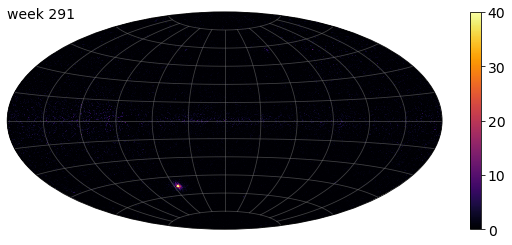

* See differenes from zero

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2ec43c6a00>
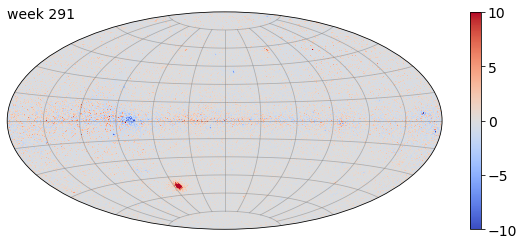

In [3]:
show("""# Study statistics

This is an evaluation of the noise distribution:
Are the fluctuations not associated with actual sources 
distributed according to Poisson counting statistics?""")
fd = FluxDifference(files/'weekly_flux_2.pkl')
week = 291; 
show(f"""Initial check, of week {week} with a solar flare. """)
v = fd[week]
hpm = HPmap(v, name=f'week {week}')
show("""* Only positive flux differences:""")
show(hpm.ait_plot(vmin=0, vmax=40), figsize=(10,4))
show("""* See differenes from zero""")                    
show(hpm.ait_plot(vmin=-10, vmax=10, cmap='coolwarm'), figsize=(10,4));

### Distribution of pixel flux differences for week 291

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2e9e212be0>
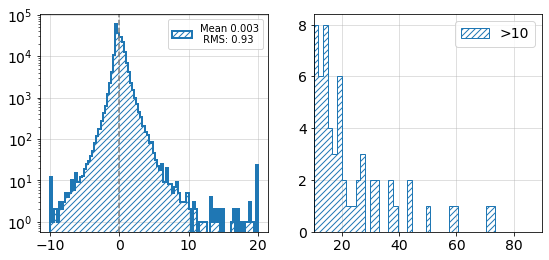

Note slight positive offset for fluctuations

In [4]:
show(f"""### Distribution of pixel flux differences for week {week}""")
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(9,4))
ax1.hist(v.clip(-10,20), np.linspace(-10,20,100), histtype='step', 
        lw=2,log=True, hatch='////',
        label =f"""Mean {v.mean():.3f}\n RMS: {v.std():.2f} """)
ax1.axvline(0, color='grey', ls='--')
ax1.legend(fontsize=10)
ax2.hist(v, np.linspace(10,90), histtype='step',
         hatch='////',log=False, label='>10');
ax2.set(xlim=(10,90)); ax2.legend()
show(fig);
show("""Note slight positive offset for fluctuations""")

### Is there a correlation between flux and exposure?

Check Cygnus at galactic (80,0)

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2e9ded66a0>
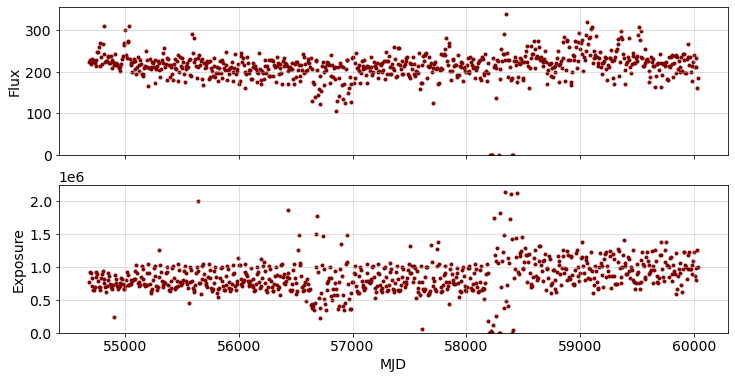

* And the correlation:

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2e9dec48b0>
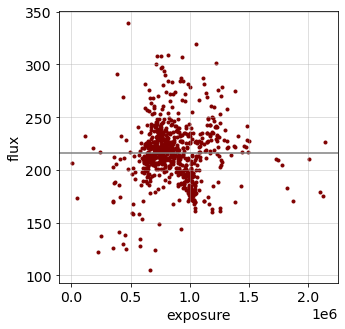

In [5]:
show(f"""### Is there a correlation between flux and exposure?

Check Cygnus at galactic (80,0)
""")

flc = FluxLightCurve(SkyCoord(80,0,unit='deg', frame='galactic'))
show(flc.series_plots());

show("""* And the correlation:""")
show(flc.flux_vs_exposure( scat_kw=dict(marker='.', color='maroon'))   )

## Study fluctuations with flux

* The flux map

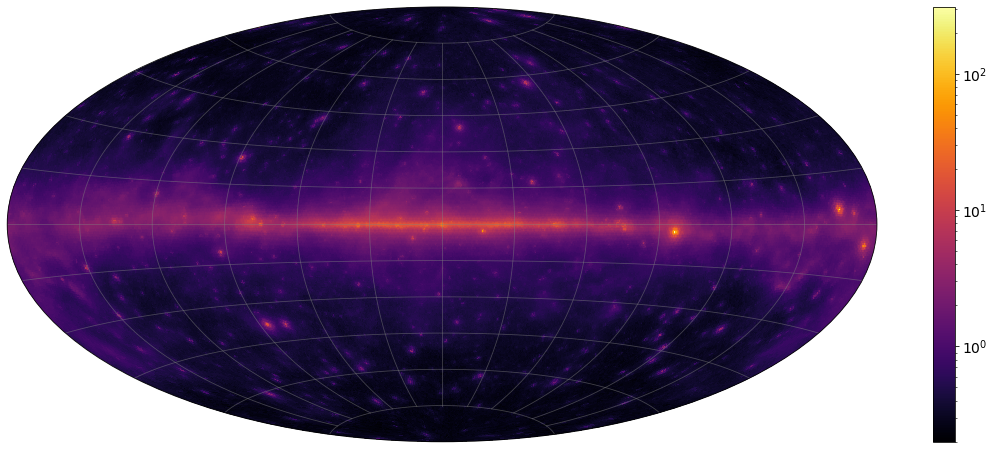

In [6]:
show(f"""## Study fluctuations with flux

* The flux map
""")
HPmap(fd.average).ait_plot(log=True);

* Make pixel DF of flux and difference

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2e9d68ea60>
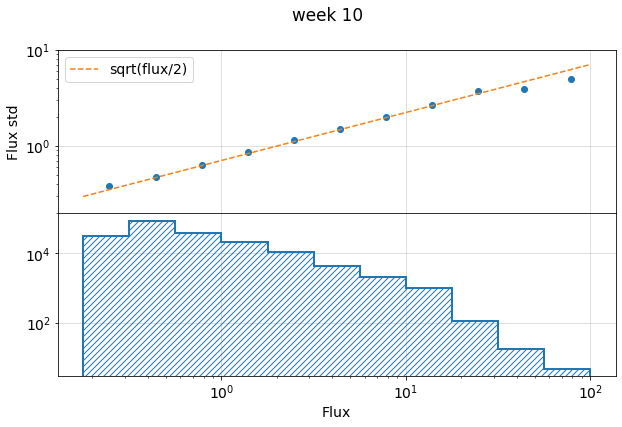

In [52]:
show(f"""* Make pixel DF of flux and difference""")
def pixel_stats(week):
    import pandas as pd
    df = pd.DataFrame.from_dict(dict(flux=fd.average, delta=fd[week]), orient='columns')

    from utilities.uplots import make_profile
    fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(10,6), sharex=True)
    plt.subplots_adjust(hspace=0)
    fig.suptitle(f'week {week}')
    # pp = profile_plot(df.flux, df.delta, ax=ax, bins=np.logspace(-0.5,2.2, 21), 
    #                   xscale='log', ylim=(-5,5)); 

    bins=np.logspace(-0.75,2.0, 12)
    prof = make_profile(df.flux, df.delta,bins)
    ax1.plot(prof.x, prof.yerr.clip(0,10), 'o')
    ax1.set(xscale='log', yscale='log', ylim=(0.2,10), ylabel='Flux std');
    ax1.plot(bins, np.sqrt(bins/2.), '--', label='sqrt(flux/2)')
    ax1.legend()
    ax2.hist(df.flux, bins=bins, log=True, histtype='step', lw=2, hatch='////')
    ax2.set(xlabel='Flux')

    return(fig)
# pixel_stats(291)

show(pixel_stats(10))


## The "King" function
$$K(x,\gamma) = \frac{1}{\sqrt{\pi}}\left(1-\frac{1}{\gamma}\right) \left[1+\frac{x^2}{2\gamma} \right]^{-\gamma}$$

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2ea043fa30>
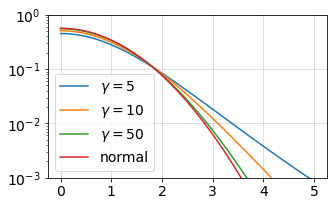

In [122]:
normal = lambda x:  np.exp(-x**2/2)/np.sqrt(np.pi)
class King:
    def __init__(self, gamma):
        self.gamma=gamma
    def __call__(self, x):
        g = self.gamma
        return 1/np.sqrt(np.pi)*(1-1/g)* np.power(1+x**2/(2*g), -g)
show(r"""## The "King" function
$$K(x,\gamma) = \frac{1}{\sqrt{\pi}}\left(1-\frac{1}{\gamma}\right) \left[1+\frac{x^2}{2\gamma} \right]^{-\gamma}$$
""")

x = np.linspace(0,5,51)
fig, ax = plt.subplots(figsize=(5,3))
ax.set(ylim=(1e-3,1))
for gamma in (5,10, 50):
    ax.semilogy(x, King(gamma)(x), label=rf'$\gamma={gamma}$');
ax.semilogy(x, 1/np.sqrt(np.pi) * np.exp(-x**2/2), label='normal');
ax.legend();
show(fig)

* Bin flux for week 10 in 10/decade bins, look at STD<br>
Compare with $\sqrt{F/2}$

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2ea07b0040>
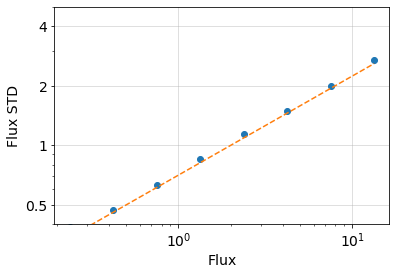

In [97]:
week=10
show(rf"""* Bin flux for week {week} in 10/decade bins, look at STD<br>
Compare with $\sqrt{{F/2}}$
""")
df = pd.DataFrame.from_dict(
    dict(flux=fd.average, delta=fd[week]), orient='columns'
)
bins=np.logspace(-0.75,1.25, 9)
fbin = np.sqrt(bins[0:-1]*bins[1:])
df.loc[:, 'fbin'] = np.digitize(df.flux, bins)
g = df.groupby('fbin')

fig, ax = plt.subplots(figsize=(6,4))
ax.loglog(fbin, g.std().delta[:-1],'o')
ax.plot(fbin, np.sqrt(fbin/2), '--')

ax.set(ylim=(0.4,5),yticks=[0.5,1,2,4], 
       yticklabels='0.5 1 2 4'.split(), xlabel='Flux', ylabel='Flux STD')
show(fig)

## Normalized distributions for each flux bin, week 10

Overplot with King(4)

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2e9db90430>
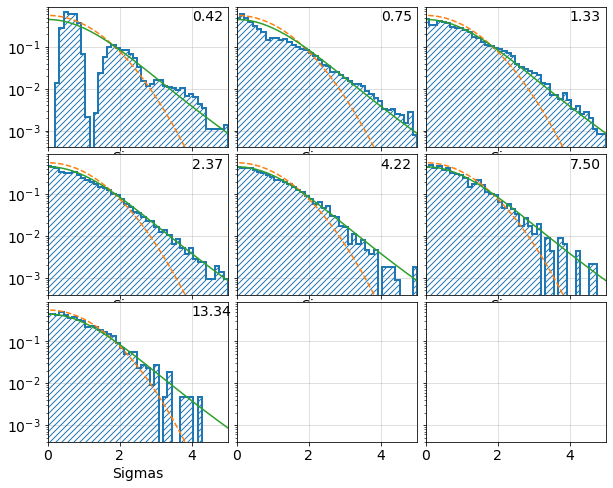

In [128]:
week, gamma = 10,4
show(f"""## Normalized distributions for each flux bin, week {week}

Overplot with King({gamma})
""")

fig, axx = plt.subplots(nrows=3, ncols=3, figsize=(10,8),sharex=True,sharey=True)
plt.subplots_adjust(hspace=0.05, wspace=0.05)
for (iflux, fdf), ax in zip(g, axx.flatten()):
    hkw = dict(bins=np.linspace(-1,5,51), histtype='step', hatch='////', lw=2); 
    ax.text(0.8, 0.9, f'{fbin[iflux]:.2f}', transform=ax.transAxes)
    ax.hist( fdf.delta/np.sqrt(fdf.flux/2), 
            log=True, density=True, **hkw);
    x = np.linspace(-1,5,40)
    ax.plot(x, normal(x), '--', label='normal')
    gamma=5
    ax.plot(x, King(gamma)(x), label=f'King({gamma})')
    
    ax.set(xlabel='Sigmas', xlim=(0,5),
           ylim=(4e-4,0.9))#,ylabel='Normalized delta')
    if iflux==7: break
show(fig)


In [123]:
# def normalized_deltas(week, query):
#     show(f"""* Select {query} for week {week}
#     """)
#     df = pd.DataFrame.from_dict(
#         dict(flux=fd.average, delta=fd[week]), orient='columns'
#     ).query(query)

#     hkw = dict(bins=np.linspace(-1,5,51), histtype='step', hatch='////', lw=2); 
#     fig, ax = plt.subplots(figsize=(5,3))
#     ax.hist( df.delta/np.sqrt(df.flux/2), 
#             log=True, density=True, **hkw);
#     x = np.linspace(-1,5,40)
#     ax.plot(x, normal(x), label='normal')
#     gamma=5
#     ax.plot(x, King(gamma)(x), label=f'King({gamma})')
    
#     ax.set(xlabel='Sigmas', xlim=(-1,5),
#            ylim=(4e-4,1),ylabel='Normalized delta')
#     ax.legend();
#     show(fig)

# query='flux>4'
# normalized_deltas(291, query)
# normalized_deltas(10,  query)
# normalized_deltas(10, 'flux>2')
# normalized_deltas(10, 'flux>1')

In [7]:
# show(f"""## Load the exposure per pixel
# """)
# exp = ExpoaureRatio(files/'weekly_flux_exposure.pkl')
# exp(

# from astropy_healpix import HEALPix as HP
# hp128 = HP(128)
# hp128.healpix_to_lonlat(range(len(v)))



# class WeeklyFluxMap:
#     def __init__(self,filename):
#         assert Path(filename).is_file(), \
#             f'{self.__class__.__name__}: {filename} is not a file.'
#         self.filename = filename
#     def __getitem__(self, idx):        
#         with open(self.filename, 'rb') as inp:
#             fdict = pickle.load(inp)
#         average = fdict[0]
#         if idx==0:
#             return average
#         return fdict[idx]-average

# fx = WeeklyFluxMap( files/'weekly_flux_2.pkl')[291]   

# def weekly_flux_map(filename, week):

#     assert Path(filename).is_file(), \
#         f'{self.__class__.__name__}: {filename} is not a file.'
   
#     with open(filename, 'rb') as inp:
#         fdict = pickle.load(inp)
#     ret = fdict[0]
#     if week>0:
#         ret = fdict[week] - ret
#     del fdict
#     return ret
# week = 291
# fx = weekly_flux_map( files/'weekly_flux_2.pkl',week) 

# av = weekly_flux_map( files/'weekly_flux_2.pkl',0) 

# week = 291
# hpm = HPmap(fx, name=f'week {week}')
# show(hpm.ait_plot(vmin=0, vmax=40), figsize=(10,4));